In [10]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

# Generate data
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

Text(0, 0.5, 'Feature 2')

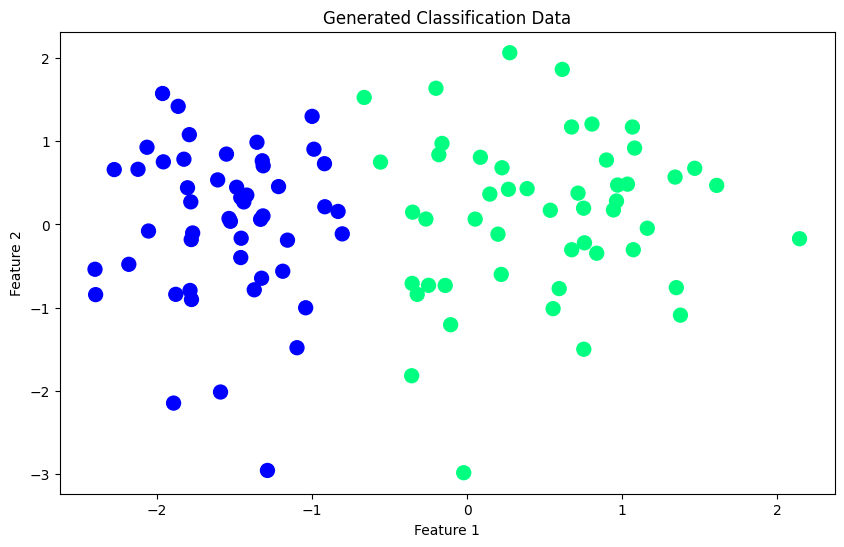

In [11]:
# Visualize data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.title('Generated Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [12]:
# Step function
def step(z):
    return 1 if z > 0 else 0

In [13]:
# Modified perceptron function to save all weights
def perceptron(X, y, n_iterations=1000):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    weights_history = []
    
    # Initialize weights
    weights = np.ones(X.shape[1])
    weights_history.append(weights.copy())
    
    lr = 0.1  # Learning rate
    
    for i in range(n_iterations):
        j = np.random.randint(0, len(X))  # Pick random sample
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        weights_history.append(weights.copy())  # Save weights at each iteration
    
    return np.array(weights_history)

In [14]:
# Run perceptron
weights_history = perceptron(X, y, n_iterations=1000)
print(f"Initial weights: {weights_history[0]}")
print(f"Final weights: {weights_history[-1]}")

Initial weights: [1. 1. 1.]
Final weights: [0.9        1.33666214 0.14760033]


In [19]:
# Create animation
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

# Set plot limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Function to compute line points
def get_line_points(weights):
    # If second coefficient is close to zero, use a vertical line
    if abs(weights[2]) < 1e-10:
        return [weights[1]/weights[0], weights[1]/weights[0]], [y_min, y_max]
    
    # Calculate slope and intercept
    m = -weights[1] / weights[2]
    b = -weights[0] / weights[2]
    
    # Get points for line
    x_line = np.array([x_min, x_max])
    y_line = m * x_line + b
    
    return x_line, y_line

# Initial line
x_line, y_line = get_line_points(weights_history[0])
line, = ax.plot(x_line, y_line, 'r-', linewidth=2)

# Title showing iteration number
title = ax.set_title('Iteration: 0')

# Update function for animation
def update(frame):
    # Skip some frames to speed up animation
    i = frame * 2  # Show every 5th iteration
    if i >= len(weights_history):
        i = len(weights_history) - 1
        
    weights = weights_history[i]
    x_line, y_line = get_line_points(weights)
    
    line.set_data(x_line, y_line)
    title.set_text(f'Iteration: {i}')
    
    return line, title

# Create animation
ani = FuncAnimation(fig, update, frames=200, interval=150, blit=True)

<IPython.core.display.Javascript object>

/Users/p0a0221/Downloads/campusx-notes/100-days-of-machine-learning/my_env/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [21]:
# Alternative visualization to save as a file
# Uncomment to save animation as a GIF

from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=15)
ani.save("perceptron_animation.gif", writer=writer)

In [9]:
# Final decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

final_weights = weights_history[-1]
m = -final_weights[1] / final_weights[2]
b = -final_weights[0] / final_weights[2]

x_input = np.linspace(x_min, x_max, 100)
y_input = m * x_input + b

plt.plot(x_input, y_input, color='red', linewidth=3)
plt.title('Final Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

<IPython.core.display.Javascript object>